## Visualizations of Global Warming in the United States
Author: Emily Padvorac

Date: April 2020

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pylab as pl
import seaborn as sns
import datetime
sns.set_style('whitegrid')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Import data sets and check to see how many values are missing in it using isnull().sum()

In [2]:
global_temp = pd.read_csv("GlobalTemperatures.csv", parse_dates = ['dt'])
print("Shape of Global csv:", global_temp.shape)
global_temp.head()

Shape of Global csv: (3192, 9)


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
country_temp = pd.read_csv("GlobalLandTemperaturesByCountry.csv",
                          parse_dates = ['dt'])
print("Shape of Country csv:", country_temp.shape)
country_temp.head()

Shape of Country csv: (577462, 4)


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [4]:
state_temp = pd.read_csv("GlobalLandTemperaturesByState.csv", 
                         parse_dates = ['dt'])
print("Shape of State csv:", state_temp.shape)
state_temp.head()

Shape of State csv: (645675, 5)


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [5]:
city_temp = pd.read_csv("GlobalLandTemperaturesByCity.csv",
                       parse_dates = ['dt'])
print("Shape of City csv:", city_temp.shape)
city_temp.head()

Shape of City csv: (8599212, 7)


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [6]:
global_temp.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [7]:
country_temp.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [8]:
state_temp.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [9]:
city_temp.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

##### Group by date and year and take the mean of each year and plot it

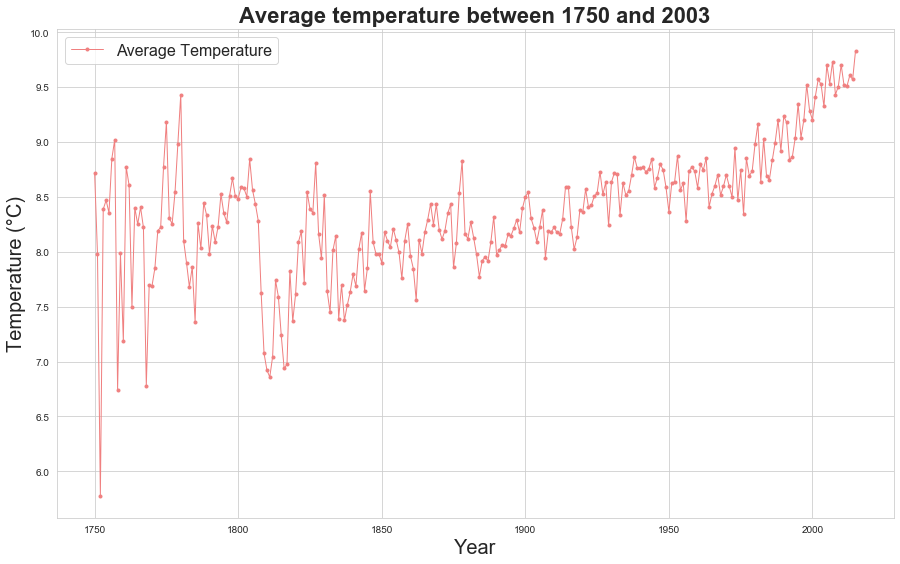

In [10]:
plt.figure(figsize = (15,9))
year_temp = global_temp.groupby(global_temp.dt.dt.year).mean()
year_temp.LandAverageTemperature.plot(linewidth = 1, color = 'lightcoral',
                                     marker = '.')
plt.title ("Average temperature between 1750 and 2003", fontsize = 22,
          fontweight = "bold")
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Temperature (°C)", fontsize = 20)
plt.legend(["Average Temperature"], loc = "upper left", fontsize = 16)

#### Plot the Average Min and Max Temperatures

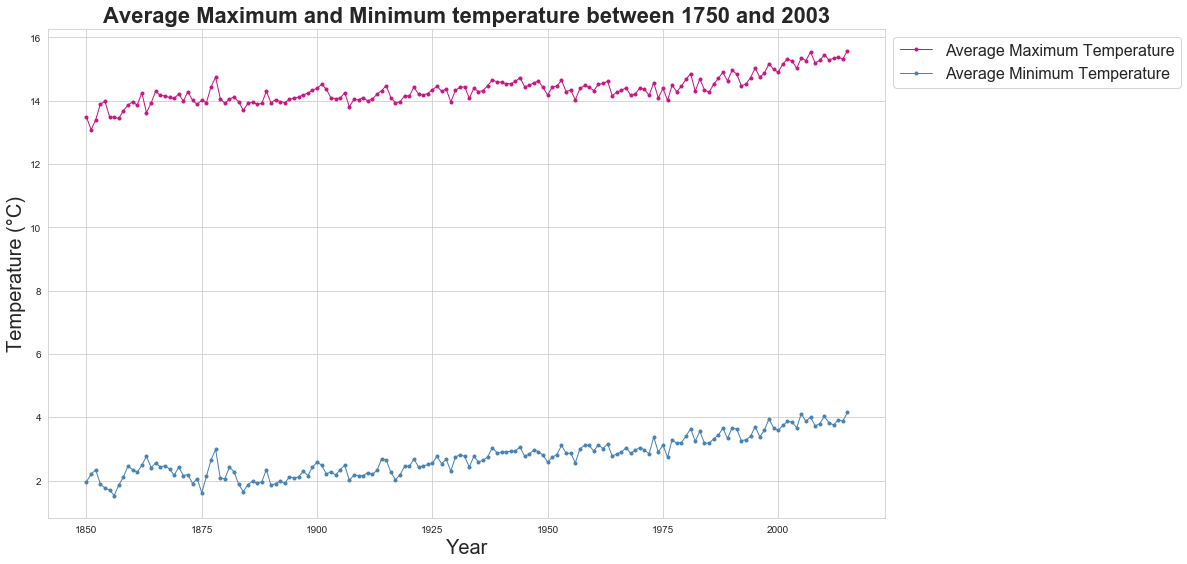

In [11]:
plt.figure(figsize = (15,9))
year_temp.LandMaxTemperature.plot(linewidth = 1, 
                                  color = 'mediumvioletred', marker = '.',
                                 label = "Average Maximum Temperature")
year_temp.LandMinTemperature.plot(linewidth = 1, color = 'steelblue',
                                     marker = '.', 
                                  label = "Average Minimum Temperature")
plt.title ("Average Maximum and Minimum temperature between 1750 and 2003",
           fontsize = 22, fontweight = "bold")
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Temperature (°C)", fontsize = 20)
plt.legend(loc = "upper left",bbox_to_anchor=(1, 1), fontsize = 16)

#### Average Temperature for United States

In [12]:
print(country_temp.shape)
country_temp.head()

(577462, 4)


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [13]:
US_temp = country_temp[country_temp.Country=="United States"]

In [14]:
print("Shape of United States df:",US_temp.shape)
US_temp.head()

Shape of United States df: (2941, 4)


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
554880,1768-09-01,15.420,2.880,United States
554881,1768-10-01,8.162,3.386,United States
554882,1768-11-01,1.591,3.783,United States
554883,1768-12-01,-2.882,4.979,United States
554884,1769-01-01,-3.952,4.856,United States


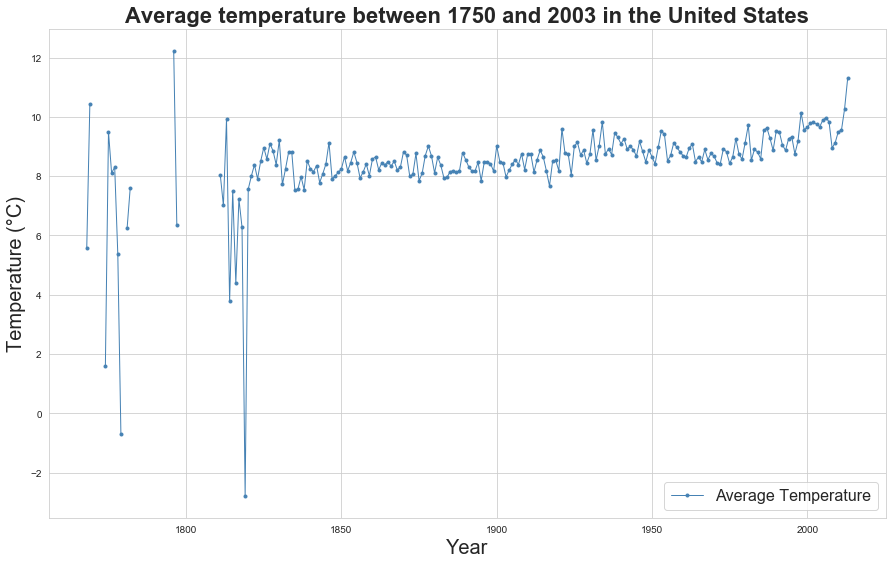

In [15]:
plt.figure(figsize = (15,9))
us_temp = US_temp.groupby(US_temp.dt.dt.year).mean()
us_temp.AverageTemperature.plot(linewidth = 1, color = 'steelblue',
                                     marker = '.')
plt.title ("Average temperature between 1750 and 2003 in the United States",
           fontsize = 22,fontweight = "bold")
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Temperature (°C)", fontsize = 20)
plt.legend(["Average Temperature"], loc = "lower right", fontsize = 16)

#### Filter the city dataframe to show only cities in the United States

In [16]:
US = city_temp[city_temp.Country == 'United States']
print("Shape of US City df:", US.shape)
US.head()

Shape of US City df: (687289, 7)


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W
47558,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W
47559,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W


#### Get the Number of unique cities in the United States in the dataframe

In [17]:
US.City.describe()

count          687289
unique            248
top       Springfield
freq             9545
Name: City, dtype: object

- There are 248 unique cities in the dataframe

In [18]:
US.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W
47558,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W
47559,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W


In [19]:
US.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [20]:
US['Latitude'] = US['Latitude'].map(lambda x: str(x)[:-1])
US['Longitude'] = US['Longitude'].map(lambda x: str(x)[:-1])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
US.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95,100.53
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95,100.53
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95,100.53
47558,1820-04-01,17.989,2.202,Abilene,United States,32.95,100.53
47559,1820-05-01,21.809,2.036,Abilene,United States,32.95,100.53


In [22]:
US.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [23]:
US['Latitude'] = pd.to_numeric(US['Latitude'], errors='coerce')
US['Longitude'] = pd.to_numeric(US['Longitude'], errors='coerce')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
US['Longitude'] = -US['Longitude'].abs()
US.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95,-100.53
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95,-100.53
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95,-100.53
47558,1820-04-01,17.989,2.202,Abilene,United States,32.95,-100.53
47559,1820-05-01,21.809,2.036,Abilene,United States,32.95,-100.53


In [25]:
US.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                float64
Longitude                               float64
dtype: object

In [26]:
#Create a geometry column
geometry = [Point(xy) for xy in zip(US['Longitude'], 
                                    US['Latitude'])]
#Coordinate reference system: WGS84
crs = {'init': 'epsg:4326'}

#Create a GDB
US_GDF = gpd.GeoDataFrame(US, crs=crs, geometry=geometry)

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [27]:
print("Shape of US GDB",US_GDF.shape)
US_GDF.head()

Shape of US GDB (687289, 8)


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,geometry
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95,-100.53,POINT (-100.53000 32.95000)
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95,-100.53,POINT (-100.53000 32.95000)
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95,-100.53,POINT (-100.53000 32.95000)
47558,1820-04-01,17.989,2.202,Abilene,United States,32.95,-100.53,POINT (-100.53000 32.95000)
47559,1820-05-01,21.809,2.036,Abilene,United States,32.95,-100.53,POINT (-100.53000 32.95000)


In [28]:
US_GDF = US_GDF.set_index('dt')
US_GDF.index = pd.to_datetime(US_GDF.index)

In [29]:
US_Avg = US_GDF.groupby([US_GDF.index.year.rename('Year'), 
                         US_GDF.City])['AverageTemperature',
                                      'Latitude','Longitude',
                                      'geometry'].mean().reset_index()
print("US Average Shape", US_Avg.shape)
US_Avg.head()

US Average Shape (55527, 5)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Year,City,AverageTemperature,Latitude,Longitude
0,1743,Akron,3.209,40.99,-80.95
1,1743,Alexandria,5.339,39.38,-76.99
2,1743,Allentown,3.264,40.99,-74.56
3,1743,Ann Arbor,2.208,42.59,-82.91
4,1743,Arlington,5.339,39.38,-76.99


In [30]:
US_Avg = US_Avg.set_index('Year')
US_Avg.head()

,City,AverageTemperature,Latitude,Longitude
Year,,,,
1743,Akron,3.209,40.99,-80.95
1743,Alexandria,5.339,39.38,-76.99
1743,Allentown,3.264,40.99,-74.56
1743,Ann Arbor,2.208,42.59,-82.91
1743,Arlington,5.339,39.38,-76.99


(array([-20., -10.,   0.,  10.,  20.,  30.,  40.]),
 <a list of 7 Text yticklabel objects>)

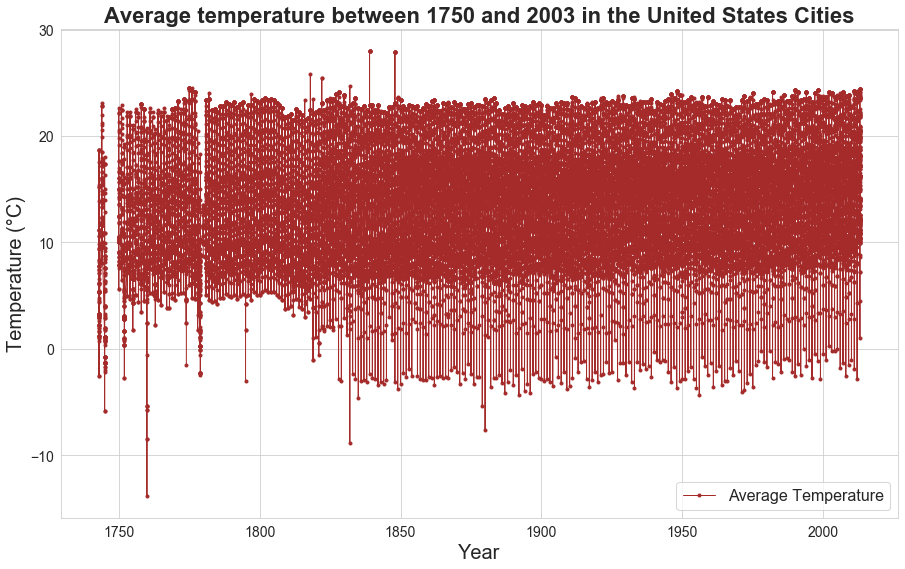

In [31]:
plt.figure(figsize = (15,9))
US_Avg.AverageTemperature.plot(linewidth = 1, color = 'brown',
                                     marker = '.')
plt.title ("Average temperature between 1750 and 2003 in the United States Cities",
           fontsize = 22,fontweight = "bold")
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Temperature (°C)", fontsize = 20)
plt.legend(["Average Temperature"], loc = "lower right", fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#### Get rid of all the NaN values and replace with the average value for the city and compare the plots

In [32]:
US_Avg = US_Avg.fillna(US_Avg.mean())
print("Shape of US_Avg without the NaN values", US_Avg.shape)
US_Avg.head()

Shape of US_Avg without the NaN values (55527, 4)


,City,AverageTemperature,Latitude,Longitude
Year,,,,
1743,Akron,3.209,40.99,-80.95
1743,Alexandria,5.339,39.38,-76.99
1743,Allentown,3.264,40.99,-74.56
1743,Ann Arbor,2.208,42.59,-82.91
1743,Arlington,5.339,39.38,-76.99


(array([-20., -10.,   0.,  10.,  20.,  30.,  40.]),
 <a list of 7 Text yticklabel objects>)

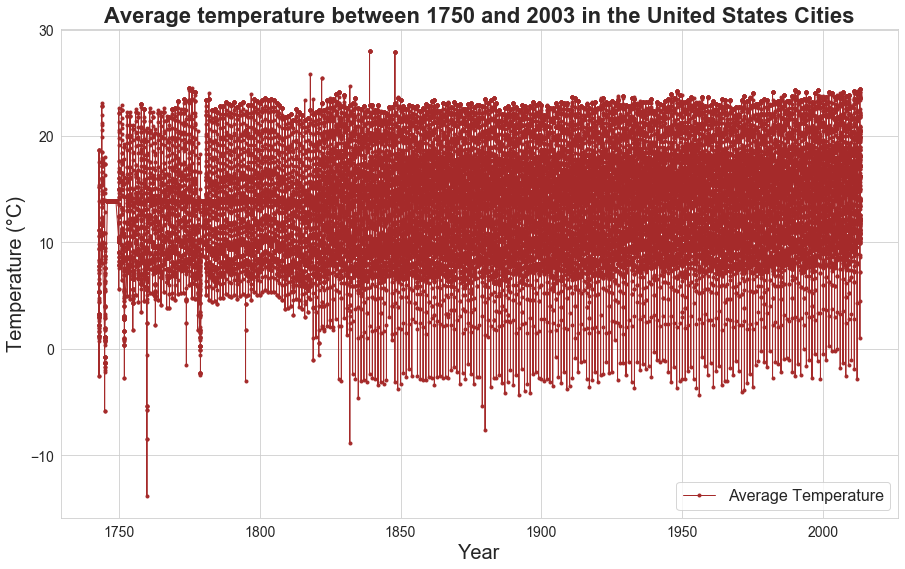

In [33]:
plt.figure(figsize = (15,9))
US_Avg.AverageTemperature.plot(linewidth = 1, color = 'brown',
                                     marker = '.')
plt.title ("Average temperature between 1750 and 2003 in the United States Cities",
           fontsize = 22,fontweight = "bold")
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Temperature (°C)", fontsize = 20)
plt.legend(["Average Temperature"], loc = "lower right", fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#### Reset the index on the dataframe and find the max and min temperature differences over the years for the cities

In [34]:
US_Avg = US_Avg.reset_index()
US_Avg.head()

,Year,City,AverageTemperature,Latitude,Longitude
0,1743,Akron,3.209,40.99,-80.95
1,1743,Alexandria,5.339,39.38,-76.99
2,1743,Allentown,3.264,40.99,-74.56
3,1743,Ann Arbor,2.208,42.59,-82.91
4,1743,Arlington,5.339,39.38,-76.99


In [35]:
US_diff = US_Avg.groupby(['City','Latitude',
                          'Longitude']).AverageTemperature.agg(['max','min']).reset_index()
print("US_diff shape", US_diff.shape)
US_diff.head()

US_diff shape (507, 5)


,City,Latitude,Longitude,max,min
0,Abilene,32.95,-100.53,19.411111,15.370333
1,Akron,40.99,-80.95,13.907464,-0.059667
2,Akron,40.99,-80.95,11.870667,3.209000
3,Albuquerque,34.56,-107.03,21.653000,9.584083
4,Alexandria,39.38,-76.99,14.187667,3.152000


In [36]:
US_diff['Difference'] = US_diff['max'] - US_diff['min']
US_diff.head()

,City,Latitude,Longitude,max,min,Difference
0,Abilene,32.95,-100.53,19.411111,15.370333,4.040778
1,Akron,40.99,-80.95,13.907464,-0.059667,13.967130
2,Akron,40.99,-80.95,11.870667,3.209000,8.661667
3,Albuquerque,34.56,-107.03,21.653000,9.584083,12.068917
4,Alexandria,39.38,-76.99,14.187667,3.152000,11.035667


#### Plot the Average Temperature for the top 20 cities with the highest temperature difference

In [37]:
city_max = US_diff.nlargest(20, columns = 'Difference')
city_max

,City,Latitude,Longitude,max,min,Difference
420,Sioux Falls,44.20,-96.15,13.907464,-13.783000,27.690464
11,Anchorage,61.88,-151.13,13.907464,-8.876250,22.783714
235,Lincoln,40.99,-95.86,13.907464,-8.455000,22.362464
312,Omaha,40.99,-95.86,13.907464,-8.455000,22.362464
311,Olathe,39.38,-95.72,15.886000,-5.702000,21.588000
461,Topeka,39.38,-95.72,15.886000,-5.702000,21.588000
196,Independence,39.38,-93.64,14.791250,-5.402000,20.193250
214,Kansas City,39.38,-93.64,14.791250,-5.402000,20.193250
319,Overland Park,39.38,-93.64,14.791250,-5.402000,20.193250
264,Minneapolis,45.81,-93.46,13.907464,-5.843500,19.750964


(array([14., 16., 18., 20., 22., 24., 26., 28., 30.]),
 <a list of 9 Text yticklabel objects>)

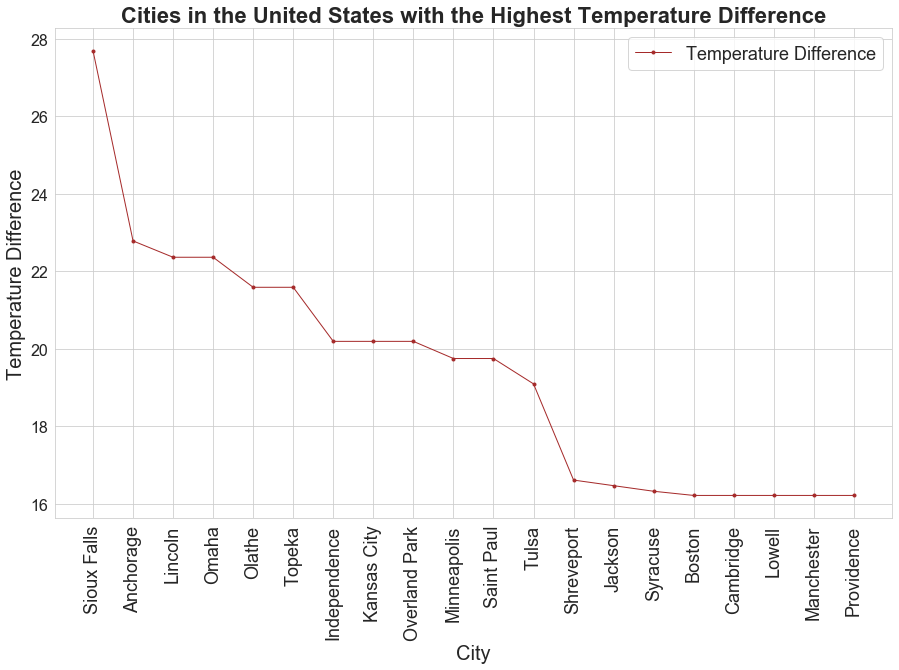

In [38]:
plt.figure(figsize = (15,9))
plt.plot(city_max['City'], city_max['Difference'],linewidth = 1,
         color = 'brown', marker = '.')
plt.title ("Cities in the United States with the Highest Temperature Difference",
           fontsize = 22,fontweight = "bold")
plt.xlabel("City", fontsize = 20)
plt.ylabel("Temperature Difference", fontsize = 20)
plt.legend(["Temperature Difference"], 
           loc = "upper right", fontsize = 18)
plt.xticks(fontsize=18, rotation = 90)
plt.yticks(fontsize=16)

In [39]:
#Create a geometry column
geometry = [Point(xy) for xy in zip(US_diff['Longitude'], 
                                    US_diff['Latitude'])]
#Coordinate reference system: WGS84
crs = {'init': 'epsg:4326'}

#Create a GDB
US_plot = gpd.GeoDataFrame(US_diff, crs=crs, geometry=geometry)

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [40]:
print("shape of US Plot", US_plot.shape)
US_plot.head()

shape of US Plot (507, 7)


,City,Latitude,Longitude,max,min,Difference,geometry
0,Abilene,32.95,-100.53,19.411111,15.370333,4.040778,POINT (-100.53000 32.95000)
1,Akron,40.99,-80.95,13.907464,-0.059667,13.967130,POINT (-80.95000 40.99000)
2,Akron,40.99,-80.95,11.870667,3.209000,8.661667,POINT (-80.95000 40.99000)
3,Albuquerque,34.56,-107.03,21.653000,9.584083,12.068917,POINT (-107.03000 34.56000)
4,Alexandria,39.38,-76.99,14.187667,3.152000,11.035667,POINT (-76.99000 39.38000)


### Import USA shapefile

In [41]:
usa = gpd.read_file("cb_2018_us_county_5m.shp")
usa.head(1)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,39,071,01074048,0500000US39071,39071,Highland,06,1432479992,12194983,"POLYGON ((-83.86976 39.05553, -83.86568 39.247..."


### plot climate for USA -- heatmap?